<a href="https://colab.research.google.com/github/Jay4l44/Student-Score-Predictions-Task1/blob/main/Task_2_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mall Customer


## Introduction

### Objective

The goal of this project is to perform customer segmentation using unsupervised machine learning techniques. Customer segmentation helps businesses:

- Understand different customer groups and their behaviors
- Develop targeted marketing strategies
- Optimize product offerings for specific segments
- Improve customer retention and acquisition

I will use K-Means clustering to identify distinct customer segments based on their annual income and spending patterns, then analyze these segments to provide actionable business insights.

### Dataset description

**Source:** Kaggle - Customer Segmentation Tutorial in Python

**Dataset:** Mall Customer Segmentation Data

This dataset contains information about customers of a retail mall, including:
- Customer demographics (age, gender)
- Annual income levels
- Spending score (1-100 scale based on customer behavior and purchasing data)

The primary features for clustering will be Annual Income and Spending Score, as these directly relate to customer value and purchasing power.

## Libraries Used

In [9]:
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print("All libraries imported successfully!")

All libraries imported successfully!


## Dataset

### Import dataset

In [10]:
# Download the customer segmentation dataset
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

# Check what files are in the dataset
print("\nFiles in the dataset:")
for file in os.listdir(path):
    print(f"- {file}")

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python

Files in the dataset:
- Mall_Customers.csv


### Load dataset

In [11]:
# Load the Mall Customers dataset
df = pd.read_csv(os.path.join(path, 'Mall_Customers.csv'))

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

### View data

In [12]:
# Get a cleaner view of the data
print("Dataset Info:")
df.info()

print("\nFirst 5 rows (cleaner display):")
print(df.head().to_string())

print("\nBasic Statistics:")
print(df.describe())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

First 5 rows (cleaner display):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Basic St

### Handle missing data

In [13]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 40)

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values percentage:")
for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}%")

total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")

# Handle missing values if they exist
print("Missing Data Handling:")
print("=" * 40)

# Check current missing values
missing_before = df.isnull().sum().sum()
print(f"Total missing values before handling: {missing_before}")

if missing_before > 0:
    print("\nHandling missing values...")

    # Case 1: For numerical columns - fill with median
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled {col} missing values with median: {df[col].median()}")

    # Case 2: For categorical columns - fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_value}")

    # Verify missing values are handled
    missing_after = df.isnull().sum().sum()
    print(f"\nTotal missing values after handling: {missing_after}")

    if missing_after == 0:
        print("All missing values successfully handled!")
    else:
        print("Some missing values remain.")

else:
    print("No missing values detected.")
    print("No handling required.")

# Final verification
print("\nFinal Missing Values Check:")
print(df.isnull().sum())

Missing Values Analysis:
Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Missing values percentage:
CustomerID: 0.00%
Gender: 0.00%
Age: 0.00%
Annual Income (k$): 0.00%
Spending Score (1-100): 0.00%

Total missing values in dataset: 0
Missing Data Handling:
Total missing values before handling: 0
No missing values detected.
No handling required.

Final Missing Values Check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Data Visualization

Exploratory Data Analysis
Dataset contains 200 customers
Age range: 18 - 70 years
Income range: $15k - $137k
Spending score range: 1 - 99


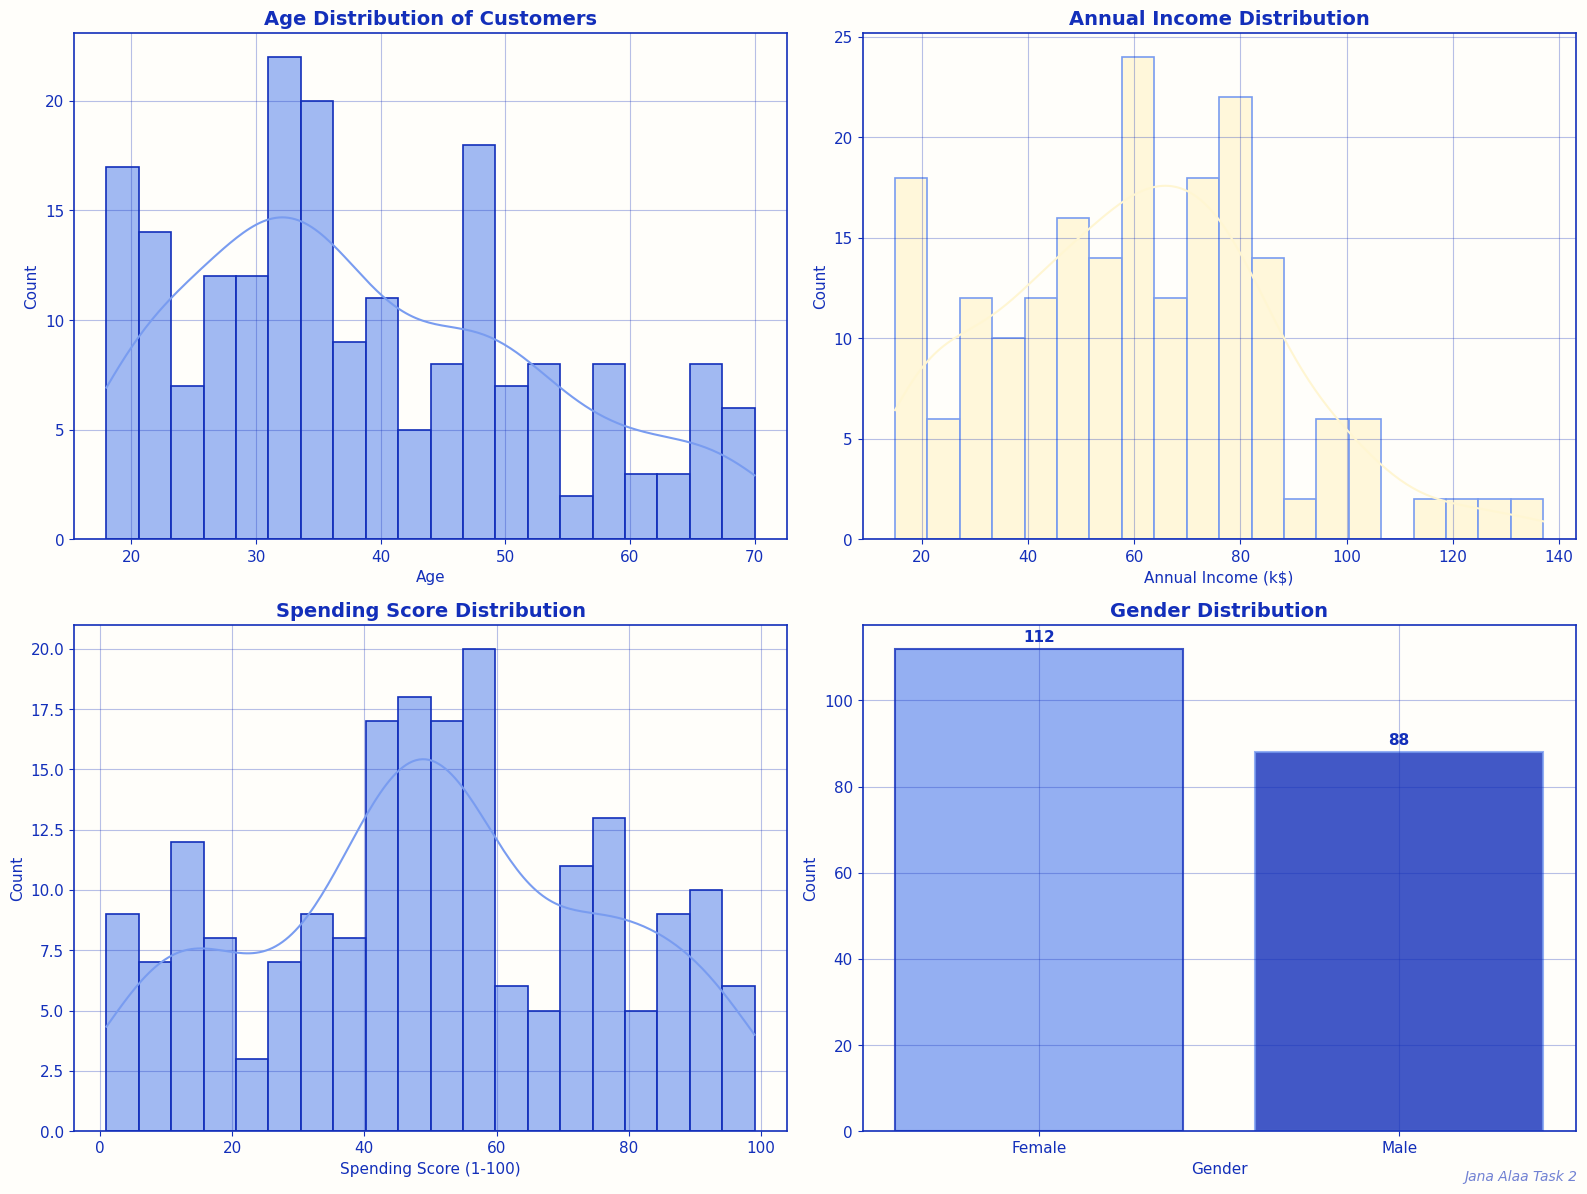

In [20]:
# Define custom color palette
custom_colors = ['#FFFEFA', '#799CF0', '#FFF6D2', '#132FBA']
accent_color = '#132FBA'  # Dark blue for text and accents

# Set up custom matplotlib parameters
plt.rcParams.update({
    'figure.facecolor': '#FFFEFA',  # Light cream background
    'axes.facecolor': '#FFFEFA',
    'axes.edgecolor': accent_color,
    'axes.linewidth': 1.2,
    'text.color': accent_color,
    'axes.labelcolor': accent_color,
    'xtick.color': accent_color,
    'ytick.color': accent_color,
    'font.size': 11,
    'font.weight': 'medium'
})

# Create custom seaborn palette
sns.set_palette(custom_colors)

# Exploratory Data Analysis with Custom Styling
print("Exploratory Data Analysis")
print("=" * 40)

# Create subplots with custom styling
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#FFFEFA')

# Print insights
print(f"Dataset contains {len(df)} customers")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Income range: ${df['Annual Income (k$)'].min()}k - ${df['Annual Income (k$)'].max()}k")
print(f"Spending score range: {df['Spending Score (1-100)'].min()} - {df['Spending Score (1-100)'].max()}")

# 1. Age distribution - light blue bars with dark blue edges
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0,0],
             color='#799CF0', alpha=0.7, edgecolor='#132FBA', linewidth=1.2)
axes[0,0].set_title('Age Distribution of Customers',
                    fontsize=14, fontweight='bold', color='#132FBA')
axes[0,0].set_xlabel('Age', fontweight='medium')
axes[0,0].grid(True, alpha=0.3, color='#132FBA')

# 2. Annual Income distribution - beige bars with light blue edges
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[0,1],
             color='#FFF6D2', alpha=0.8, edgecolor='#799CF0', linewidth=1.2)
axes[0,1].set_title('Annual Income Distribution',
                    fontsize=14, fontweight='bold', color='#132FBA')
axes[0,1].set_xlabel('Annual Income (k$)', fontweight='medium')
axes[0,1].grid(True, alpha=0.3, color='#132FBA')

# 3. Spending Score distribution - light blue bars with dark blue edges
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1,0],
             color='#799CF0', alpha=0.7, edgecolor='#132FBA', linewidth=1.2)
axes[1,0].set_title('Spending Score Distribution',
                    fontsize=14, fontweight='bold', color='#132FBA')
axes[1,0].set_xlabel('Spending Score (1-100)', fontweight='medium')
axes[1,0].grid(True, alpha=0.3, color='#132FBA')

# 4. Gender distribution with contrasting edge colors
gender_counts = df['Gender'].value_counts()
bars = axes[1,1].bar(gender_counts.index, gender_counts.values,
                     color=['#799CF0', '#132FBA'], alpha=0.8,
                     edgecolor=['#132FBA', '#799CF0'], linewidth=1.5)
axes[1,1].set_title('Gender Distribution',
                    fontsize=14, fontweight='bold', color='#132FBA')
axes[1,1].set_xlabel('Gender', fontweight='medium')
axes[1,1].set_ylabel('Count', fontweight='medium')
axes[1,1].grid(True, alpha=0.3, color='#132FBA')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom',
                   fontweight='bold', color='#132FBA')
# Add watermark
fig.text(0.99, 0.01, 'Jana Alaa Task 2', fontsize=10, alpha=0.6, ha='right', style='italic', color='#132FBA')

plt.tight_layout()
plt.show()

## Data Clustering

### Key relationship analysis

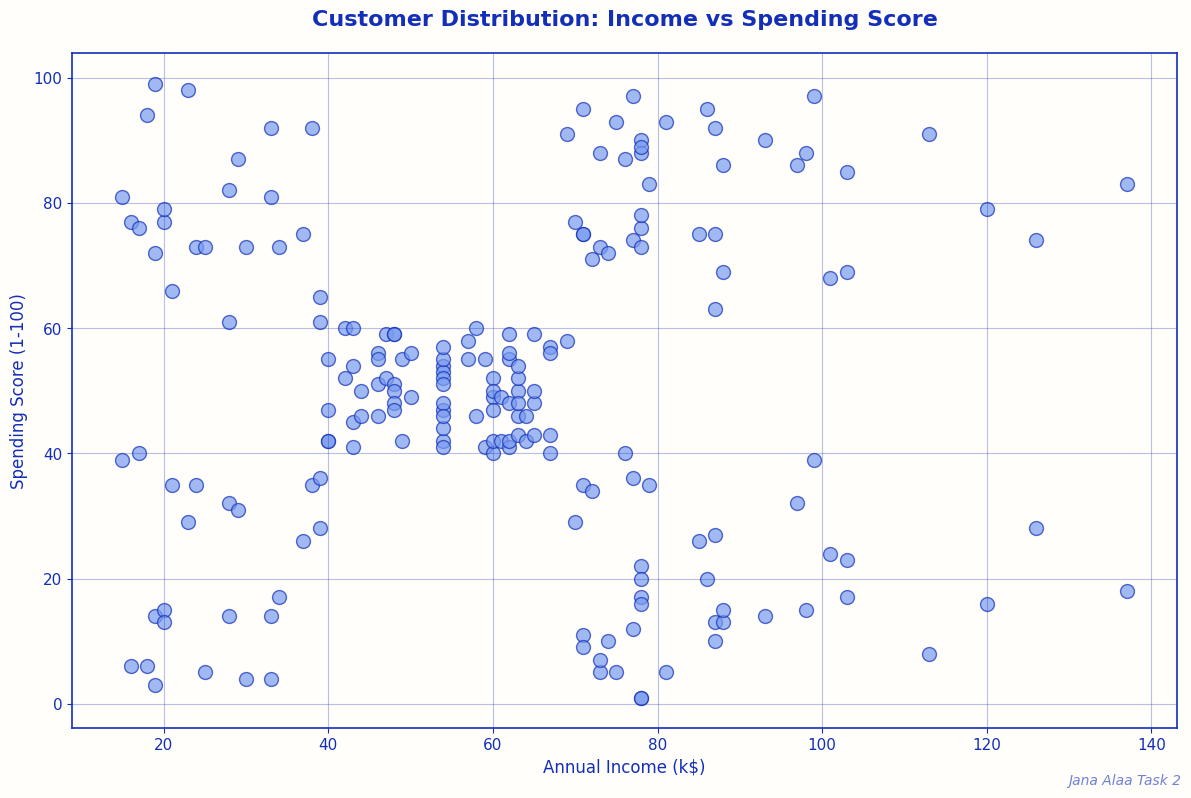

This will guide our K-means clustering approach.


In [21]:
print("=" * 50)

# Income vs Spending Score
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c='#799CF0', alpha=0.7, s=100, edgecolors='#132FBA', linewidth=1)

plt.title('Customer Distribution: Income vs Spending Score',
          fontsize=16, fontweight='bold', color='#132FBA', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='medium')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='medium')
plt.grid(True, alpha=0.3, color='#132FBA')

plt.gca().set_facecolor('#FFFEFA')
plt.gcf().patch.set_facecolor('#FFFEFA')


plt.figtext(0.99, 0.01, 'Jana Alaa Task', fontsize=10, alpha=0.6, ha='right', style='italic', color='#132FBA')

plt.tight_layout()
plt.show()

print("This will guide our K-means clustering approach.")

### Data processing

In [22]:
# Select features for clustering (Income and Spending Score)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

print("Selected features for clustering:")
print(X.head())

# Check feature statistics before scaling
print(f"\nFeature ranges before scaling:")
print(f"Annual Income: ${X['Annual Income (k$)'].min()}k - ${X['Annual Income (k$)'].max()}k")
print(f"Spending Score: {X['Spending Score (1-100)'].min()} - {X['Spending Score (1-100)'].max()}")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(f"\nAfter scaling - mean should be ~0, std should be ~1:")
print(X_scaled_df.describe())

print("Data preprocessing complete!")

Selected features for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Feature ranges before scaling:
Annual Income: $15k - $137k
Spending Score: 1 - 99

After scaling - mean should be ~0, std should be ~1:
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            1.002509e+00
min         -1.738999e+00           -1.910021e+00
25%         -7.275093e-01           -5.997931e-01
50%          3.587926e-02           -7.764312e-03
75%          6.656748e-01            8.851316e-01
max          2.917671e+00            1.894492e+00
Data preprocessing complete!


### Opitmal number for clustering

Calculating WCSS and Silhouette Scores...
k=1: WCSS = 400.00
k=2: WCSS = 269.69, Silhouette = 0.321
k=3: WCSS = 157.70, Silhouette = 0.467
k=4: WCSS = 108.92, Silhouette = 0.494
k=5: WCSS = 65.57, Silhouette = 0.555
k=6: WCSS = 55.06, Silhouette = 0.540
k=7: WCSS = 44.86, Silhouette = 0.528
k=8: WCSS = 37.23, Silhouette = 0.455
k=9: WCSS = 32.39, Silhouette = 0.457
k=10: WCSS = 29.98, Silhouette = 0.443


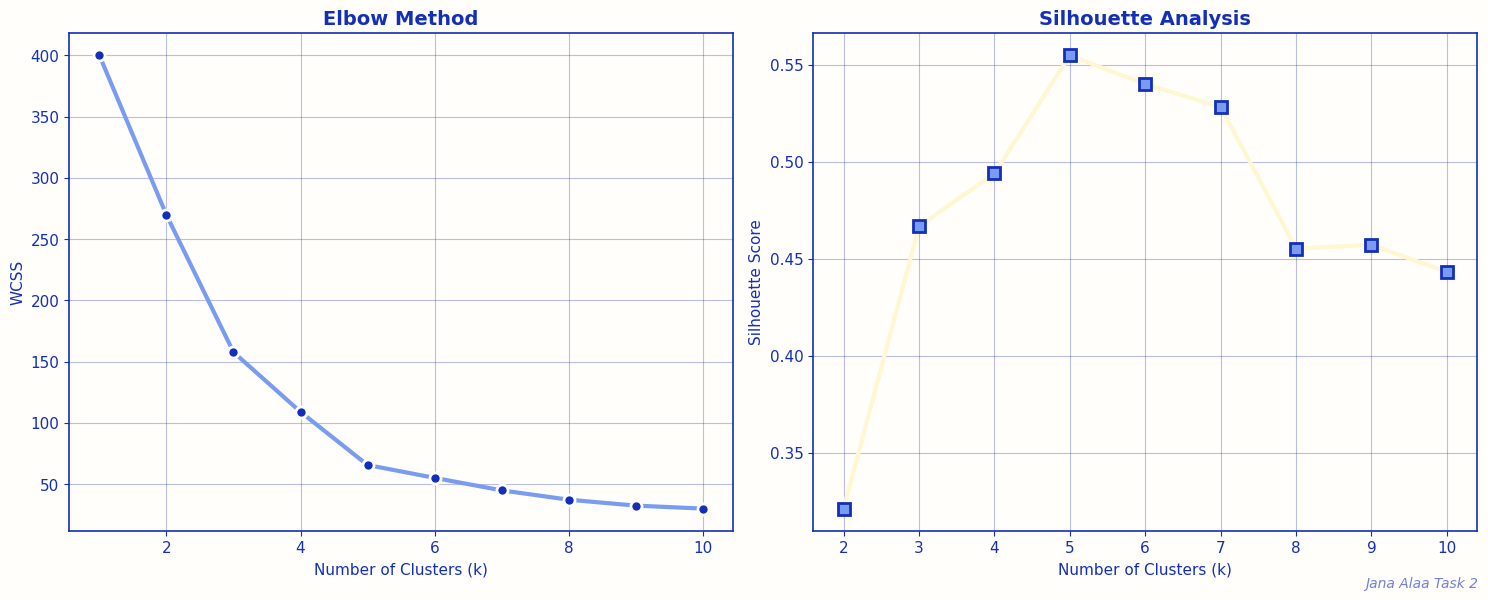


Analysis Results:
Largest WCSS drop: k=1 to k=2 (130.31 reduction)
Significant drops: k=2 to k=3 (111.99), k=3 to k=4 (48.78)
Elbow appears around k=4 or k=5
Best silhouette score: k=5 (0.555)

Recommended k: 5 clusters


In [27]:
print("=" * 45)

# Calculate WCSS for different k values
wcss = []  # Within Cluster Sum of Squares
silhouette_scores = []
k_range = range(1, 11)

print("Calculating WCSS and Silhouette Scores...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if k > 1:  # Silhouette score needs at least 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"k={k}: WCSS = {kmeans.inertia_:.2f}, Silhouette = {score:.3f}")
    else:
        print(f"k={k}: WCSS = {kmeans.inertia_:.2f}")

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#FFFEFA')

# Plot 1: Elbow Method
ax1.plot(k_range, wcss, marker='o', linewidth=3, markersize=8, color='#799CF0', markerfacecolor='#132FBA', markeredgecolor='#FFFEFA', markeredgewidth=2)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold', color='#132FBA')
ax1.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='medium')
ax1.set_ylabel('WCSS', fontsize=11, fontweight='medium')
ax1.grid(True, alpha=0.3, color='#132FBA')
ax1.set_facecolor('#FFFEFA')

# Plot 2: Silhouette Analysis
ax2.plot(range(2, 11), silhouette_scores, marker='s', linewidth=3, markersize=8, color='#FFF6D2', markerfacecolor='#799CF0', markeredgecolor='#132FBA', markeredgewidth=2)
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold', color='#132FBA')
ax2.set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='medium')
ax2.set_ylabel('Silhouette Score', fontsize=11, fontweight='medium')
ax2.grid(True, alpha=0.3, color='#132FBA')
ax2.set_facecolor('#FFFEFA')

plt.figtext(0.99, 0.01, 'Jana Alaa Task 2', fontsize=10, alpha=0.6, ha='right', style='italic', color='#132FBA')

plt.tight_layout()
plt.show()

# Analysis
print(f"\nAnalysis Results:")
print(f"Largest WCSS drop: k=1 to k=2 ({400.00-269.69:.2f} reduction)")
print(f"Significant drops: k=2 to k=3 ({269.69-157.70:.2f}), k=3 to k=4 ({157.70-108.92:.2f})")
print(f"Elbow appears around k=4 or k=5")

if silhouette_scores:
    best_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"Best silhouette score: k={best_k} ({max(silhouette_scores):.3f})")
    print(f"\nRecommended k: {best_k} clusters")

## Clusterig Implementation

### Centers and distribution

In [26]:
print("=" * 40)

# Apply K-Means with optimal number of clusters
optimal_k = 5
print(f"Implementing K-Means with k={optimal_k} clusters...")

# Fit the model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Get cluster centers (in original scale)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print(f"Clustering completed successfully!")
print(f"Final silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# Display cluster centers
centers_df = pd.DataFrame(cluster_centers,
                         columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print("\nCluster Centers:")
print(centers_df.round(1))

# Show cluster distribution
print(f"\nCluster Distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for i in range(optimal_k):
    print(f"Cluster {i}: {cluster_counts[i]} customers ({cluster_counts[i]/len(df)*100:.1f}%)")

print("\nDataset with cluster assignments:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

Implementing K-Means with k=5 clusters...
Clustering completed successfully!
Final silhouette score: 0.555

Cluster Centers:
           Annual Income (k$)  Spending Score (1-100)
Cluster 0                55.3                    49.5
Cluster 1                86.5                    82.1
Cluster 2                25.7                    79.4
Cluster 3                88.2                    17.1
Cluster 4                26.3                    20.9

Cluster Distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)

Dataset with cluster assignments:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4
5  

### Clustering visualization

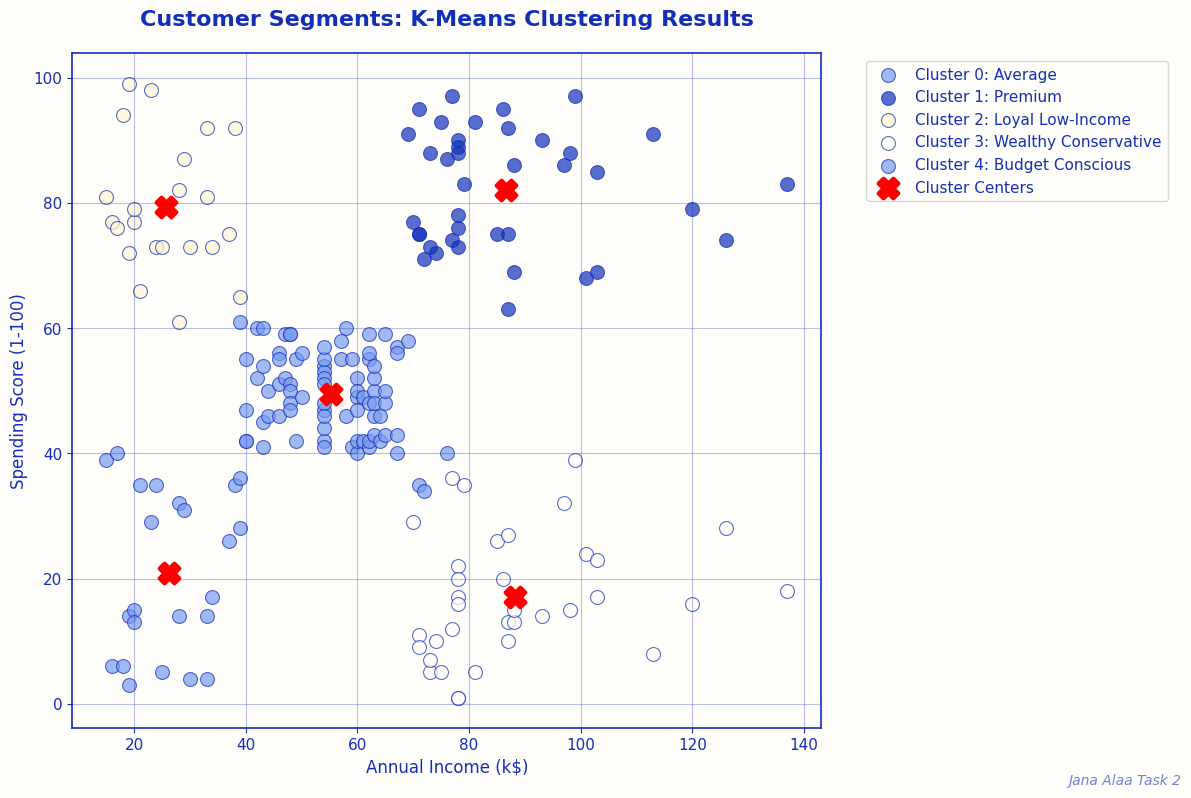

In [28]:
print("=" * 40)

# Create the clustered scatter plot
plt.figure(figsize=(12, 8))

# Define colors for each cluster using your custom palette
cluster_colors = ['#799CF0', '#132FBA', '#FFF6D2', '#FFFEFA', '#799CF0']
cluster_names = ['Average', 'Premium', 'Loyal Low-Income', 'Wealthy Conservative', 'Budget Conscious']

# Plot each cluster
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=cluster_colors[i], label=f'Cluster {i}: {cluster_names[i]}',
               alpha=0.7, s=100, edgecolors='#132FBA', linewidth=0.8)

# Plot cluster centers
plt.scatter(centers_df['Annual Income (k$)'],
           centers_df['Spending Score (1-100)'],
           c='red', marker='X', s=200, linewidth=3,
           label='Cluster Centers')

plt.title('Customer Segments: K-Means Clustering Results',
          fontsize=16, fontweight='bold', color='#132FBA', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='medium')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='medium')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, color='#132FBA')

# Styling
plt.gca().set_facecolor('#FFFEFA')
plt.gcf().patch.set_facecolor('#FFFEFA')

plt.figtext(0.99, 0.01, 'Jana Alaa Task 2',
           fontsize=10, alpha=0.6, ha='right', style='italic', color='#132FBA')

plt.tight_layout()
plt.show()

## Business Insights

In [29]:
print("=" * 45)

# Create detailed cluster analysis
cluster_analysis = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std'],
    'Gender': lambda x: x.value_counts().to_dict()
}).round(1)

print("Detailed Cluster Statistics:")
print(cluster_analysis)

# Business segment interpretation
segment_profiles = {
    0: {"name": "Average Customers", "strategy": "Balanced marketing, loyalty programs"},
    1: {"name": "Premium Customers", "strategy": "Luxury products, VIP services, premium experiences"},
    2: {"name": "Loyal Low-Income", "strategy": "Value deals, payment plans, reward loyal behavior"},
    3: {"name": "Wealthy Conservative", "strategy": "Quality emphasis, savings promotions, practical benefits"},
    4: {"name": "Budget Conscious", "strategy": "Discounts, basic products, cost-effective solutions"}
}

print("\nBusiness Segment Analysis:")
print("=" * 30)
for cluster_id, info in segment_profiles.items():
    count = df[df['Cluster'] == cluster_id].shape[0]
    percentage = (count/len(df))*100

    print(f"\nCluster {cluster_id}: {info['name']}")
    print(f"Size: {count} customers ({percentage:.1f}%)")
    print(f"Income: ${centers_df.iloc[cluster_id]['Annual Income (k$)']:.1f}k")
    print(f"Spending: {centers_df.iloc[cluster_id]['Spending Score (1-100)']:.1f}/100")
    print(f"Marketing Strategy: {info['strategy']}")

# Revenue potential analysis
print(f"\nRevenue Potential Analysis:")
print("=" * 25)
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = len(cluster_data)

    # Simple revenue potential score (income * spending * size)
    revenue_potential = (avg_income * avg_spending * size) / 1000
    print(f"Cluster {i}: Revenue Potential Score = {revenue_potential:.1f}")

Detailed Cluster Statistics:
        Annual Income (k$)                Spending Score (1-100)            \
                      mean   std min  max                   mean   std min   
Cluster                                                                      
0                     55.3   9.0  39   76                   49.5   6.5  34   
1                     86.5  16.3  69  137                   82.1   9.4  63   
2                     25.7   7.6  15   39                   79.4  10.5  61   
3                     88.2  16.4  70  137                   17.1  10.0   1   
4                     26.3   7.9  15   39                   20.9  13.0   3   

              Age                            Gender  
        max  mean   std                    <lambda>  
Cluster                                              
0        61  42.7  16.4  {'Female': 48, 'Male': 33}  
1        97  32.7   3.7  {'Female': 21, 'Male': 18}  
2        99  25.3   5.3   {'Female': 13, 'Male': 9}  
3        39  41.1  11.

## Alternative Clustering Method

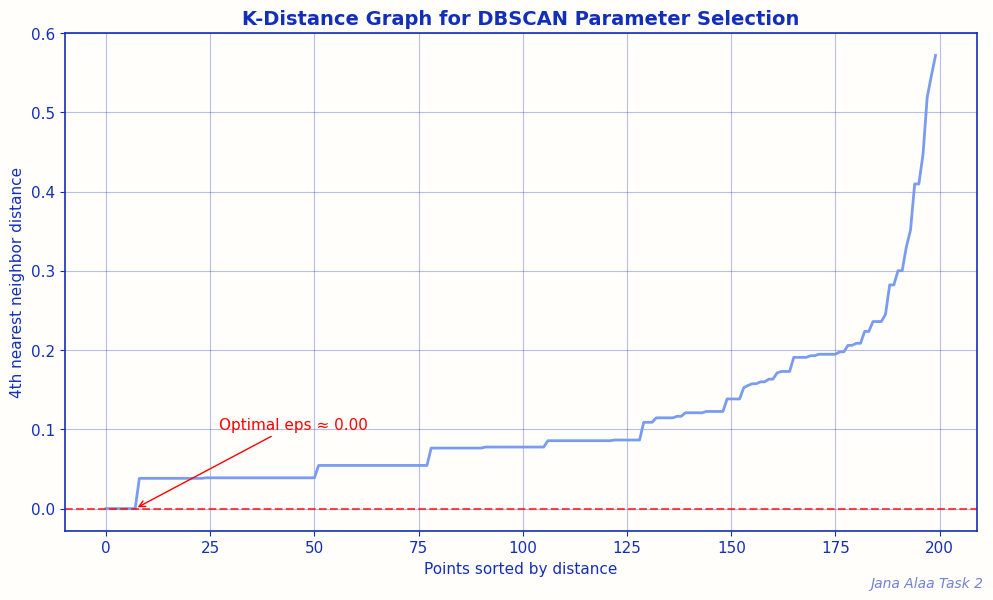

Suggested eps value: 0.000
eps=0.3: 8 clusters, 23 noise points (11.5%)
eps=0.5: 2 clusters, 8 noise points (4.0%)
eps=0.7: 1 clusters, 0 noise points (0.0%)
eps=1.0: 1 clusters, 0 noise points (0.0%)
eps=1.2: 1 clusters, 0 noise points (0.0%)

Using eps=0.5 for final DBSCAN clustering...

Final DBSCAN Results:
Number of clusters: 2
Number of noise points: 8
DBSCAN Silhouette Score: 0.388

Cluster Distribution:
Noise: 8 points (4.0%)
Cluster 0: 157 points (78.5%)
Cluster 1: 35 points (17.5%)

Re-running DBSCAN with eps=0.3 for better granularity...
DBSCAN (eps=0.3) Results: 8 clusters, 23 noise points


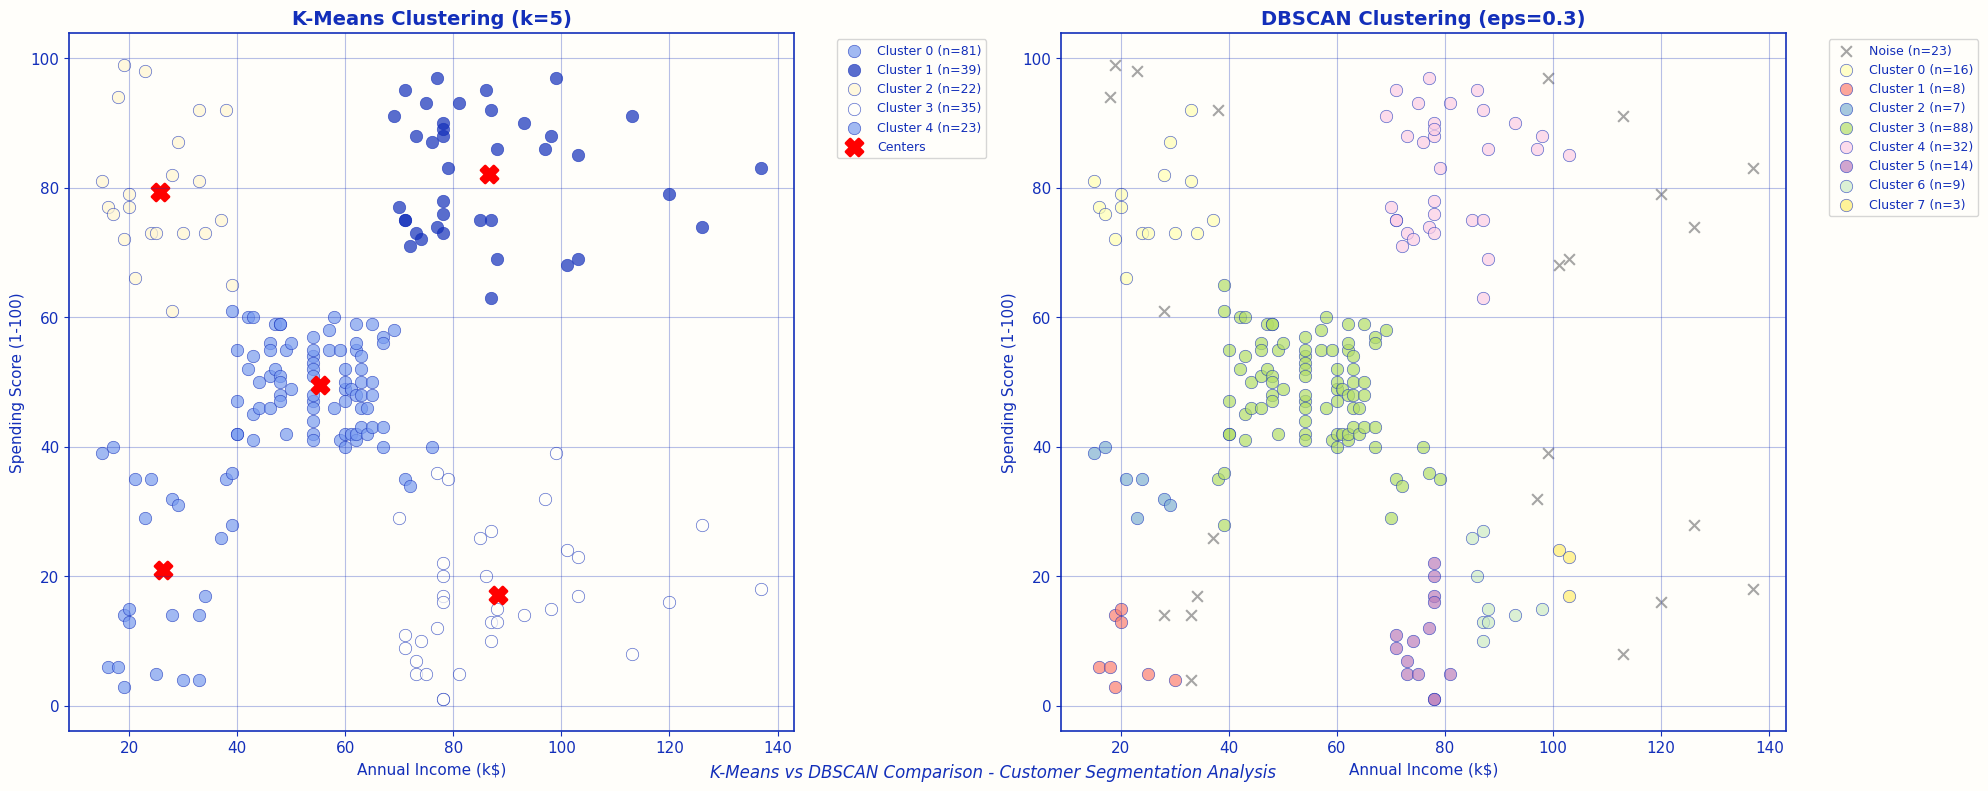


Method Comparison Summary:
K-Means: 5 clusters, Silhouette = 0.555
DBSCAN:  8 clusters + 23 noise, Silhouette = varies by eps

K-Means: Better for equal-sized, spherical clusters
DBSCAN:  Better for irregular shapes and outlier detection


In [36]:
print("=" * 45)

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use k-distance graph to find optimal eps
neighbors = NearestNeighbors(n_neighbors=4)  # min_samples will be 4
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Take 4th nearest neighbor distance

plt.figure(figsize=(10, 6))
plt.plot(distances, color='#799CF0', linewidth=2)
plt.title('K-Distance Graph for DBSCAN Parameter Selection',
          fontsize=14, fontweight='bold', color='#132FBA')
plt.xlabel('Points sorted by distance', fontsize=11, fontweight='medium')
plt.ylabel('4th nearest neighbor distance', fontsize=11, fontweight='medium')
plt.grid(True, alpha=0.3, color='#132FBA')
plt.gca().set_facecolor('#FFFEFA')
plt.gcf().patch.set_facecolor('#FFFEFA')

knee_point = np.diff(distances, 2).argmax() + 1
optimal_eps = distances[knee_point]
plt.axhline(y=optimal_eps, color='red', linestyle='--', alpha=0.7)
plt.annotate(f'Optimal eps ≈ {optimal_eps:.2f}',
             xy=(knee_point, optimal_eps), xytext=(knee_point+20, optimal_eps+0.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             color='red', fontweight='medium')

plt.figtext(0.99, 0.01, 'Jana Alaa Task 2',
           fontsize=10, alpha=0.6, ha='right', style='italic', color='#132FBA')
plt.tight_layout()
plt.show()

print(f"Suggested eps value: {optimal_eps:.3f}")

# Try different eps values to find one that works well
eps_values = [0.3, 0.5, 0.7, 1.0, 1.2]
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_percent = (n_noise / len(labels)) * 100

    results.append({
        'eps': eps,
        'clusters': n_clusters,
        'noise_points': n_noise,
        'noise_percent': noise_percent
    })

    print(f"eps={eps}: {n_clusters} clusters, {n_noise} noise points ({noise_percent:.1f}%)")

# Choose the best eps (reasonable number of clusters, not too much noise)
best_eps = 0.5  # You can adjust this based on the results above

print(f"\nUsing eps={best_eps} for final DBSCAN clustering...")

# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=best_eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze results
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nFinal DBSCAN Results:")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

# Calculate silhouette score if possible
if n_clusters_dbscan > 1:
    non_noise_mask = dbscan_labels != -1
    if non_noise_mask.sum() > 1:
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask],
                                           dbscan_labels[non_noise_mask])
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

print(f"\nCluster Distribution:")
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise: {count} points ({count/len(df)*100:.1f}%)")
    else:
        print(f"Cluster {label}: {count} points ({count/len(df)*100:.1f}%)")

# Use eps=0.3 for more detailed clustering
print("\nRe-running DBSCAN with eps=0.3 for better granularity...")

dbscan_final = DBSCAN(eps=0.3, min_samples=4)
dbscan_labels_final = dbscan_final.fit_predict(X_scaled)

# Re-run DBSCAN with eps=0.3 and create comparison
dbscan_final = DBSCAN(eps=0.3, min_samples=4)
dbscan_labels_final = dbscan_final.fit_predict(X_scaled)
df['DBSCAN_Final'] = dbscan_labels_final

# Get final DBSCAN stats
n_clusters_final = len(set(dbscan_labels_final)) - (1 if -1 in dbscan_labels_final else 0)
n_noise_final = list(dbscan_labels_final).count(-1)

print(f"DBSCAN (eps=0.3) Results: {n_clusters_final} clusters, {n_noise_final} noise points")

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.patch.set_facecolor('#FFFEFA')

# K-Means plot (left)
kmeans_colors = ['#799CF0', '#132FBA', '#FFF6D2', '#FFFEFA', '#799CF0']
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    ax1.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=kmeans_colors[i], alpha=0.7, s=80,
               edgecolors='#132FBA', linewidth=0.5,
               label=f'Cluster {i} (n={len(cluster_data)})')

ax1.scatter(centers_df['Annual Income (k$)'],
           centers_df['Spending Score (1-100)'],
           c='red', marker='X', s=150, linewidth=2, label='Centers')

ax1.set_title('K-Means Clustering (k=5)', fontsize=14, fontweight='bold', color='#132FBA')
ax1.set_xlabel('Annual Income (k$)', fontsize=11, fontweight='medium')
ax1.set_ylabel('Spending Score (1-100)', fontsize=11, fontweight='medium')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3, color='#132FBA')
ax1.set_facecolor('#FFFEFA')

# DBSCAN plot (right)
unique_dbscan = np.unique(dbscan_labels_final)
dbscan_colors = plt.cm.Set3(np.linspace(0, 1, len(unique_dbscan)))

for i, label in enumerate(unique_dbscan):
    if label == -1:
        # Noise points
        noise_data = df[df['DBSCAN_Final'] == label]
        ax2.scatter(noise_data['Annual Income (k$)'],
                   noise_data['Spending Score (1-100)'],
                   c='gray', marker='x', s=60, alpha=0.7,
                   label=f'Noise (n={len(noise_data)})')
    else:
        cluster_data = df[df['DBSCAN_Final'] == label]
        ax2.scatter(cluster_data['Annual Income (k$)'],
                   cluster_data['Spending Score (1-100)'],
                   c=[dbscan_colors[i]], alpha=0.7, s=80,
                   edgecolors='#132FBA', linewidth=0.5,
                   label=f'Cluster {label} (n={len(cluster_data)})')

ax2.set_title('DBSCAN Clustering (eps=0.3)', fontsize=14, fontweight='bold', color='#132FBA')
ax2.set_xlabel('Annual Income (k$)', fontsize=11, fontweight='medium')
ax2.set_ylabel('Spending Score (1-100)', fontsize=11, fontweight='medium')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, color='#132FBA')
ax2.set_facecolor('#FFFEFA')

plt.figtext(0.5, 0.02, 'K-Means vs DBSCAN Comparison - Customer Segmentation Analysis',
           fontsize=12, ha='center', style='italic', color='#132FBA')

plt.tight_layout()
plt.show()

# Comparison summary
print("\nMethod Comparison Summary:")
print("=" * 30)
print(f"K-Means: 5 clusters, Silhouette = 0.555")
print(f"DBSCAN:  {n_clusters_final} clusters + {n_noise_final} noise, Silhouette = varies by eps")
print(f"\nK-Means: Better for equal-sized, spherical clusters")
print(f"DBSCAN:  Better for irregular shapes and outlier detection")


## Key Findings

This customer segmentation analysis successfully identified five distinct customer groups using K-Means clustering with a strong silhouette score of 0.555. The analysis revealed clear patterns in customer behavior based on annual income and spending patterns:

### Customer Segments Identified:

Cluster Zero - Average Customers (40.5%): $55k income, moderate spending (49.5/100)

Cluster One - Premium Customers (19.5%): $86k income, high spending (82.1/100)

Cluster Two - Loyal Low-Income (11.0%): $26k income, high spending (79.4/100)

Cluster Three - Wealthy Conservative (17.5%): $88k income, low spending (17.1/100)

Cluster Four - Budget Conscious (11.5%): $26k income, low spending (20.9/100)

**Method Comparison Results:**
K-Means clustering outperformed DBSCAN for this business application, providing more interpretable and actionable segments. While DBSCAN identified outliers effectively, its fragmented approach (8 clusters + noise points) was less suitable for developing coherent marketing strategies.

### Marketing Strategies by Segment

**Average Customers (Cluster 0) - Priority Segment**
- Implement comprehensive loyalty programs with tiered benefits
- Focus on retention through personalized offers and consistent service quality
- Develop cross-selling opportunities for complementary products
- Target with balanced marketing emphasizing both value and quality

**Premium Customers (Cluster 1) - High-Value Segment**
- Create exclusive VIP services and premium product lines
- Offer luxury experiences and early access to new products
- Implement personalized concierge services
- Focus on relationship building rather than price-sensitive promotions

**Loyal Low-Income (Cluster 2) - Growth Opportunity**
- Develop flexible payment plans and installment options
- Create value bundles that maximize perceived benefit
- Reward loyalty through points programs and exclusive discounts
- Offer financing options for higher-ticket items

**Wealthy Conservative (Cluster 3) - Conversion Target**
- Emphasize product quality, durability, and practical benefits
- Implement savings-focused promotions and bulk purchase discounts
- Provide detailed product information and comparison tools
- Focus on long-term value propositions rather than impulse purchases

**Budget Conscious (Cluster 4) - Efficiency Focus**
- Streamline basic product offerings with competitive pricing
- Implement cost-effective marketing channels
- Focus on essential features without premium add-ons
- Develop entry-level product lines with clear value messaging

### Strategic Recommendations

**Resource Allocation**: Prioritize Premium and Average customers (60% of customer base) for maximum revenue impact while developing targeted conversion strategies for Wealthy Conservative customers.

**Product Development**: Create tiered product offerings that serve each segment's distinct needs and price sensitivities.

**Marketing Budget Distribution**: Allocate marketing spend proportionally to revenue potential while maintaining cost-effective approaches for price-sensitive segments.

**Customer Retention**: Implement segment-specific retention strategies, with particular focus on nurturing the high-spending but price-sensitive Loyal Low-Income group.